In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_excel("./DATA/Data_Train.xlsx")
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [7]:
test = pd.read_excel("./DATA/Data_Test.xlsx")
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [8]:
print(train.shape)
print(test.shape)

(6237, 9)
(1560, 8)


In [9]:
data = train

In [10]:
data.shape

(6237, 9)

In [11]:
data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [12]:
data.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [14]:
data['Reviews'] = data.Reviews.apply(lambda r: float(r.split()[0]))
data['Ratings']= data.Ratings.str.extract('(\d+)')
data["Ratings"] = data.Ratings.astype(float)
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [15]:
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)

['Title', 'Author', 'Edition', 'Synopsis', 'Genre', 'BookCategory']
['Reviews', 'Ratings', 'Price']


In [16]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: data[col].nunique(), cat_cols))
d = dict(zip(cat_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('BookCategory', 11),
 ('Genre', 345),
 ('Edition', 3370),
 ('Author', 3679),
 ('Synopsis', 5549),
 ('Title', 5568)]

In [17]:
data1= pd.get_dummies(data, columns= ['BookCategory'])
data1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,Price,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),220.00,1,0,0,0,0,0,0,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),202.93,0,0,1,0,0,0,0,0,0,0,0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,299.00,0,0,0,0,0,0,1,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),180.00,0,0,0,0,0,1,0,0,0,0,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,965.62,0,1,0,0,0,0,0,0,0,0,0


In [18]:
data2 = data1.drop(['Title','Genre', 'Author','Synopsis','Edition'],1, inplace= False)
data2.head()

C:\Users\patil\AppData\Local\Temp/ipykernel_2024/815977072.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data2 = data1.drop(['Title','Genre', 'Author','Synopsis','Edition'],1, inplace= False)


,Reviews,Ratings,Price,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,4.0,8.0,220.00,1,0,0,0,0,0,0,0,0,0,0
1,3.9,14.0,202.93,0,0,1,0,0,0,0,0,0,0,0
2,4.8,6.0,299.00,0,0,0,0,0,0,1,0,0,0,0
3,4.1,13.0,180.00,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1.0,965.62,0,1,0,0,0,0,0,0,0,0,0


In [19]:
data2.skew()

Reviews                                             -1.646196
Ratings                                              6.716416
Price                                                6.749866
BookCategory_Action & Adventure                      2.185851
BookCategory_Arts, Film & Photography                3.026321
BookCategory_Biographies, Diaries & True Accounts    2.752102
BookCategory_Comics & Mangas                         2.793739
BookCategory_Computing, Internet & Digital Media     3.053350
BookCategory_Crime, Thriller & Mystery               2.400093
BookCategory_Humour                                  2.940909
BookCategory_Language, Linguistics & Writing         2.758428
BookCategory_Politics                                4.031570
BookCategory_Romance                                 2.870559
BookCategory_Sports                                  3.213828
dtype: float64

6.749865573718627

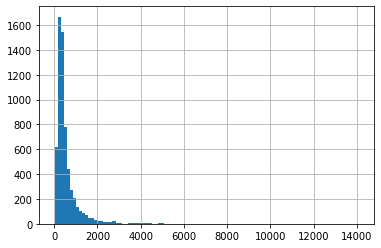

In [20]:
data2.Price.hist(bins = 100)
print()
data2.Price.skew()

In [21]:
corr_matrix = data2.corr(method='spearman')
corr_matrix

,Reviews,Ratings,Price,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
Reviews,1.000000,-0.237119,0.221209,-0.001964,0.055514,-0.012549,0.105757,-0.019096,-0.106099,0.054828,-0.055098,-0.014230,-0.054720,0.064412
Ratings,-0.237119,1.000000,-0.288681,-0.013456,-0.062887,0.232679,-0.067619,-0.039075,0.091030,-0.110408,0.023870,0.005089,0.038062,-0.125817
Price,0.221209,-0.288681,1.000000,-0.093823,0.168208,-0.116849,0.117048,0.192154,-0.190717,0.098524,-0.091353,0.024289,-0.169109,0.136360
BookCategory_Action & Adventure,-0.001964,-0.013456,-0.093823,1.000000,-0.116806,-0.126288,-0.124759,-0.115941,-0.140687,-0.119616,-0.126054,-0.091094,-0.122026,-0.111043
"BookCategory_Arts, Film & Photography",0.055514,-0.062887,0.168208,-0.116806,1.000000,-0.097722,-0.096539,-0.089716,-0.108864,-0.092560,-0.097541,-0.070489,-0.094424,-0.085925
"BookCategory_Biographies, Diaries & True Accounts",-0.012549,0.232679,-0.116849,-0.126288,-0.097722,1.000000,-0.104376,-0.096999,-0.117701,-0.100073,-0.105459,-0.076211,-0.102089,-0.092901
BookCategory_Comics & Mangas,0.105757,-0.067619,0.117048,-0.124759,-0.096539,-0.104376,1.000000,-0.095825,-0.116277,-0.098862,-0.104182,-0.075289,-0.100853,-0.091776
"BookCategory_Computing, Internet & Digital Media",-0.019096,-0.039075,0.192154,-0.115941,-0.089716,-0.096999,-0.095825,1.000000,-0.108058,-0.091875,-0.096819,-0.069967,-0.093725,-0.085289
"BookCategory_Crime, Thriller & Mystery",-0.106099,0.091030,-0.190717,-0.140687,-0.108864,-0.117701,-0.116277,-0.108058,1.000000,-0.111483,-0.117483,-0.084900,-0.113729,-0.103493
BookCategory_Humour,0.054828,-0.110408,0.098524,-0.119616,-0.092560,-0.100073,-0.098862,-0.091875,-0.111483,1.000000,-0.099888,-0.072185,-0.096696,-0.087993


In [22]:
#corrleation with area
corr_matrix.Price.sort_values(ascending=False)

Price                                                1.000000
Reviews                                              0.221209
BookCategory_Computing, Internet & Digital Media     0.192154
BookCategory_Arts, Film & Photography                0.168208
BookCategory_Sports                                  0.136360
BookCategory_Comics & Mangas                         0.117048
BookCategory_Humour                                  0.098524
BookCategory_Politics                                0.024289
BookCategory_Language, Linguistics & Writing        -0.091353
BookCategory_Action & Adventure                     -0.093823
BookCategory_Biographies, Diaries & True Accounts   -0.116849
BookCategory_Romance                                -0.169109
BookCategory_Crime, Thriller & Mystery              -0.190717
Ratings                                             -0.288681
Name: Price, dtype: float64

In [23]:
#Take targate variable into y
y = data2['Price']
X = data2.drop('Price',axis = 1)

In [24]:
# Split data into train and test formate
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [27]:
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21 , shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: -429817.089971 (96822.021797)
ScaledLASSO: -429645.882055 (96777.607410)
ScaledEN: -433269.582453 (97425.563400)
ScaledKNN: -498380.535738 (90844.964624)
ScaledCART: -637673.347710 (248969.049288)
ScaledGBM: -426538.468932 (95318.574369)


In [29]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-424891.732955 (96943.756439) with: {'n_estimators': 50}
-426802.343695 (95501.620797) with: {'n_estimators': 100}
-432431.081820 (95691.519756) with: {'n_estimators': 200}
-438486.957352 (95735.300341) with: {'n_estimators': 300}
-443203.899528 (96595.226801) with: {'n_estimators': 400}
Best: -424891.732955 using {'n_estimators': 50}


In [30]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = GradientBoostingRegressor(random_state=21, n_estimators=50)
model.fit(rescaled_X_train, y)

# transform the validation dataset
# rescaled_X_test = scaler.transform(X_test)
# predictions = model.predict(rescaled_X_test)
# print (mean_squared_error(y_test, predictions))

GradientBoostingRegressor(n_estimators=50, random_state=21)

In [ ]:
import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']